In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/data/images.csv')
Y=pd.read_csv('/content/drive/MyDrive/Machine Learning/data/labels.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import numpy as np
#Thử lại data 
def hog(img_gray, cell_size=8, block_size=2, bins=9):
    img = img_gray
    h, w = img.shape # 32, 32
    
    # gradient
    xkernel = np.array([[-1, 0, 1]])
    ykernel = np.array([[-1], [0], [1]])
    dx = cv2.filter2D(img, cv2.CV_32F, xkernel)
    dy = cv2.filter2D(img, cv2.CV_32F, ykernel)
    
    # histogram
    magnitude = np.sqrt(np.square(dx) + np.square(dy)) #Cường độ Gradient 
    orientation = np.arctan(np.divide(dy, dx+0.00001)) # radian
    orientation = np.degrees(orientation) # -90 -> 90
    orientation += 90 # 0 -> 180
    
    num_cell_x = w // cell_size 
    num_cell_y = h // cell_size 
    hist_tensor = np.zeros([num_cell_y, num_cell_x, bins]) 
    for cx in range(num_cell_x):
        for cy in range(num_cell_y):
            ori = orientation[cy*cell_size:cy*cell_size+cell_size, cx*cell_size:cx*cell_size+cell_size]
            mag = magnitude[cy*cell_size:cy*cell_size+cell_size, cx*cell_size:cx*cell_size+cell_size]
            hist, _ = np.histogram(ori, bins=bins, range=(0, 180), weights=mag) # 
            hist_tensor[cy, cx, :] = hist
        pass
    pass
    
    # normalization
    redundant_cell = block_size-1
    feature_tensor = np.zeros([num_cell_y-redundant_cell, num_cell_x-redundant_cell, block_size*block_size*bins])
    for bx in range(num_cell_x-redundant_cell):
        for by in range(num_cell_y-redundant_cell): 
            by_from = by
            by_to = by+block_size
            bx_from = bx
            bx_to = bx+block_size
            v = hist_tensor[by_from:by_to, bx_from:bx_to, :].flatten() 
            feature_tensor[by, bx, :] = v / LA.norm(v, 2)
            # avoid NaN:
            if np.isnan(feature_tensor[by, bx, :]).any():
                feature_tensor[by, bx, :] = v
    
    return feature_tensor.flatten() 
from numpy import linalg as LA
import numpy as np
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
data=np.array(data, dtype=np.uint8)
data_raw=data.reshape(data.shape[0],32,32,3)
hog_image=[]
for i in range(len(data_raw)):
  hog_image.append(hog(cv2.cvtColor(data_raw[i], cv2.COLOR_BGR2GRAY)))
X_train, X_test, y_train, y_test = train_test_split(hog_image,Y, test_size=0.2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression


In [ ]:
import os
import pickle
list_class=['SVC','KNN' , 'Navie','Logistic Regression','Random Forest','Decision Tree']
y_score_list=[]
for i in list_class:
  print(i)
  if i=='SVC':
      os.chdir('/content/drive/MyDrive/Machine Learning/Model')
      vec = open("{}_hog.pkl".format(i), 'rb')
      loaded_model = pickle.load(vec)
      print('load xong model')
      Y_pred_proba=loaded_model.decision_function(X_test)
  elif i=='Logistic Regression':
    from sklearn.neighbors import KNeighborsClassifier
  classifier=KNeighborsClassifier(metric='cosine')
    print("Logistic Regression train xong")
    Y_pred_proba=classifier.predict_proba(X_test)
  else:
      os.chdir('/content/drive/MyDrive/Machine Learning/Model')
      vec = open("{}_hog.pkl".format(i), 'rb')
      loaded_model = pickle.load(vec)
      print('load xong model')
      Y_pred_proba=loaded_model.predict_proba(X_test)
  y_score_list.append(Y_pred_proba)
  print('XONG du doan')

SVC
load xong model
XONG du doan
KNN
load xong model
XONG du doan
Navie
load xong model
XONG du doan
Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression train xong
XONG du doan
Random Forest
load xong model
XONG du doan
Decision Tree
load xong model
XONG du doan


In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
y_train= label_encoder.fit_transform(y_train) 
y_test = label_encoder.fit_transform(y_test) 

y_train = np.array(y_train)
y_test = np.array(y_test)
from keras.utils import np_utils
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
n_classes = 8
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


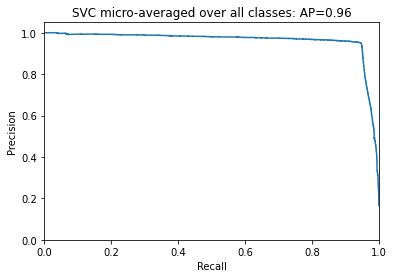

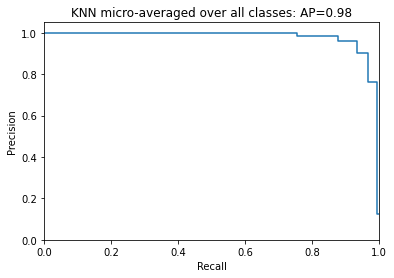

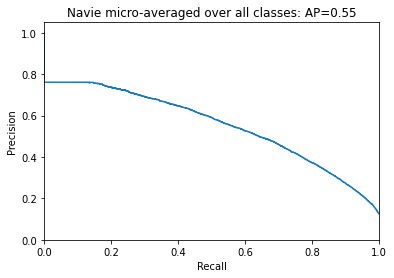

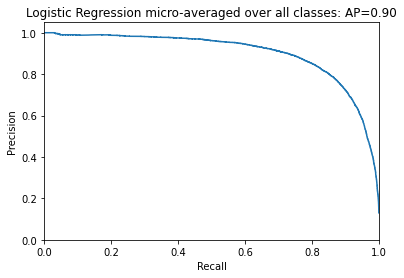

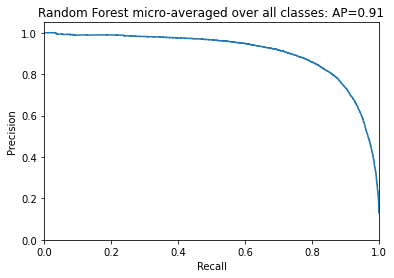

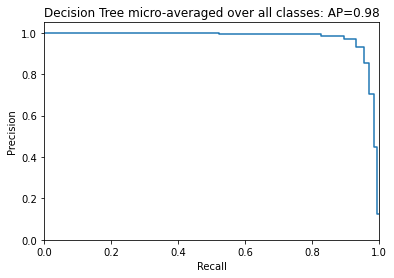

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
list 
# For each class
for (Y_pred_proba,clf) in zip(y_score_list,list_class):
  precision = dict()
  recall = dict()
  average_precision = dict()
  for i in range(n_classes):
      precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                          Y_pred_proba[:, i])
      average_precision[i] = average_precision_score(Y_test[:, i], Y_pred_proba[:, i])

  # A "micro-average": quantifying score on all classes jointly
  precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
      Y_pred_proba.ravel())
  average_precision["micro"] = average_precision_score(Y_test, Y_pred_proba,
                                                      average="micro")
  plt.figure()
  plt.step(recall['micro'], precision['micro'], where='post')

  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title(
      '{} micro-averaged over all classes: AP={:0.2f}'.format(clf,average_precision["micro"]))